In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pynbody
import pynbody.plot.sph as sph

In [2]:
filepth = 'Starting-Stuff/IsoB_1000/GLX.0'
timestep = (['1000'])

filenom = (filepth+timestep[0])
dno = timestep[0]
gal = pynbody.load(filenom) 
print (gal.dm)

t_now =  gal.properties['time'].in_units('Myr')
timestr = str( np.round(float(t_now),1) )

#Put CoM in middle
pynbody.analysis.angmom.faceon(gal)

<FamilySubSnap "Starting-Stuff\IsoB_1000\GLX.01000::dm" len=1000000>


<Transformation faceon>

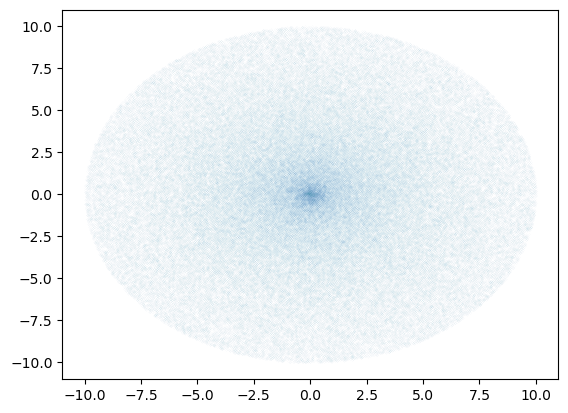

In [3]:
x = gal.dm['x']
y = gal.dm['y']

#age = gal.star['tform'].in_units('Myr') < 1000

rho = np.sqrt(x**2 + y**2)
phi = np.angle(x + 1j * y)

radii = 10
mask = (rho <= radii) * (rho >= -radii)

x = x[mask]
y = y[mask]

rho = rho[mask]
phi = phi[mask]

plt.plot(x, y, marker='.', linestyle='None', markersize=0.1, alpha=0.2)
#plt.gca().invert_xaxis()


In [ ]:
conc = gal.dm["rho"]
conc = conc[mask]
plt.clf()
plt.scatter(x, y, c=conc, cmap='plasma', s=0.05)#, alpha=0.05)
plt.colorbar()

In [ ]:
plt.clf()
sph.image(gal.dm,qty='vr',width='20 kpc',cmap='magma',show_cbar = True, resolution=1000)
plt.xlabel('$x \;{\\rm [kpc]}$',fontsize=15)
plt.ylabel('$y \;{\\rm [kpc]}$',fontsize=15)

In [ ]:
res = 1000

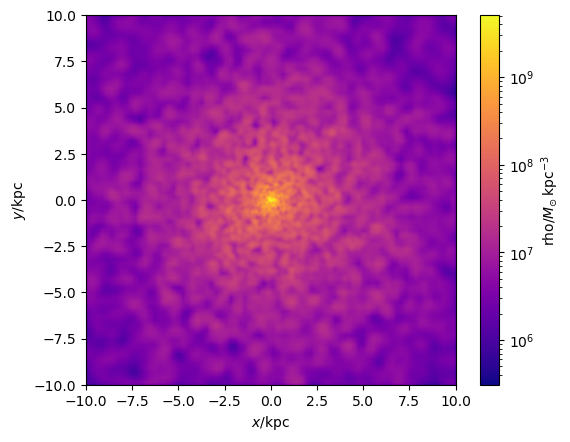

In [30]:
plt.clf()
figG=plt.figure(1)
axG=figG.add_subplot(1,1,1)

dm=sph.image(gal.dm,qty='rho',width='20 kpc',cmap='plasma', resolution=res,
                       subplot=axG,show_cbar=True, return_array=True, log=True)

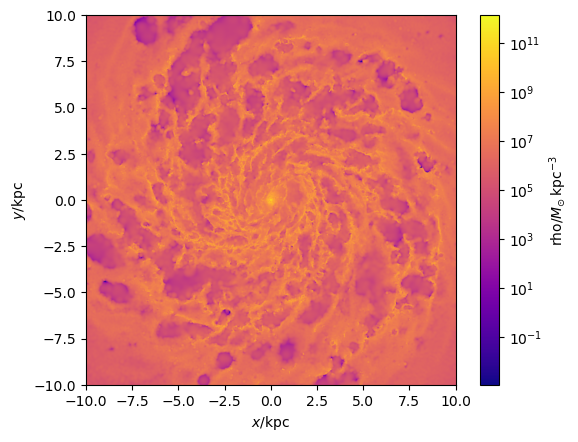

In [31]:
plt.clf()
figG=plt.figure(1)
axG=figG.add_subplot(1,1,1)

gas=sph.image(gal.gas,qty='rho',width='20 kpc',cmap='plasma', resolution=res,
                       subplot=axG,show_cbar=True, return_array=True, log=True)

In [ ]:
from matplotlib import colors

def norm(arr, n = 1):
    return (arr - np.min(arr))/(np.max(arr) - np.min(arr)) * n

relation = norm(gas) - norm(dm)
relation = norm(-relation)
relation[relation >= 0.3] = 0
plt.clf()
plt.imshow(relation, origin='lower', cmap='plasma', norm = colors.LogNorm())
plt.colorbar(label='Normalised Gas - DM Density')
plt.title('Gas - DM Density Relation')
plt.xlabel('$x \;{\\rm [kpc]}$',fontsize=15)
plt.ylabel('$y \;{\\rm [kpc]}$',fontsize=15)

xticks = plt.xticks()[0][1:]
yticks = plt.yticks()[0][1:]
plt.xticks(xticks, np.round(xticks/res * 20 - 10,1))
plt.yticks(yticks, np.round(xticks/res * 20 - 10,1))

1. Run spiral structure/flocculency code on both gas/star and relation -> see if it changes anything
2. If they are both similar, i.e return same clusters then dark matter doesn't affect spiral structure? But it could also be that dark matter affects spiral structure -> more defined spiral arms?

In [ ]:
from matplotlib import colors

def norm(arr, n = 1):
    return (arr - np.min(arr))/(np.max(arr) - np.min(arr)) * n

relation = gas - dm
plt.clf()
plt.imshow(-relation, origin='lower', cmap='plasma', norm=colors.LogNorm())
plt.colorbar()
xticks = plt.xticks()[0][1:]
yticks = plt.yticks()[0][1:]
plt.xticks(xticks, np.round(xticks/res * 20 - 10,1))
plt.yticks(yticks, np.round(xticks/res * 20 - 10,1))

In [ ]:
x1 = np.indices(relation.shape)[0].flatten()
x2 = np.indices(relation.shape)[1].flatten()
X = np.array([x1, x2]).T
Y = relation.flatten()

In [ ]:
dens = np.mean(relation)
avg_dist = (dens * 1.5) ** (-1/3) 
avg_dist *= 1.5

In [ ]:
from sklearn.cluster import DBSCAN

clf = DBSCAN(eps=np.sqrt(2))
clf.fit(X, sample_weight=Y)

In [ ]:
for i in range(-1, clf.labels_.max() + 1):
    print(i, np.sum(clf.labels_ == i))

In [ ]:
temp = X

In [ ]:
X = norm(temp, 2) - 1
X = X * 10
X

In [6]:
outliers = clf.labels_ == -1

radius = 10 #kpc
plt.clf()
#make a scatter plot with points coloured according to the DBSCAN labels
cmap = plt.get_cmap("plasma")
colors = cmap((clf.labels_+1)/np.max(clf.labels_+1))

#do things with sample weights and gas particle weights?

def dbscan(ax, fs=15):
    ax.scatter(X[outliers,1], X[outliers,0], facecolor='black', marker='.',
            s=0.1, alpha=0.05)
    ax.scatter(X[~outliers,1], X[~outliers,0], facecolor=colors[~outliers], marker='.',
            s=0.1, alpha=0.3)
    ax.set_xlabel('x (kpc)', fontsize=fs)
    ax.set_ylabel('y (kpc)', fontsize=fs)
    ax.tick_params(axis='both', labelsize=12)
    
    

fig, ax = plt.subplots(figsize=(10,10))
dbscan(ax)

#fig.gca().invert_xaxis()
fig.tight_layout()

NameError: name 'clf' is not defined

Text(0.5, 0, 'Radius (kpc)')

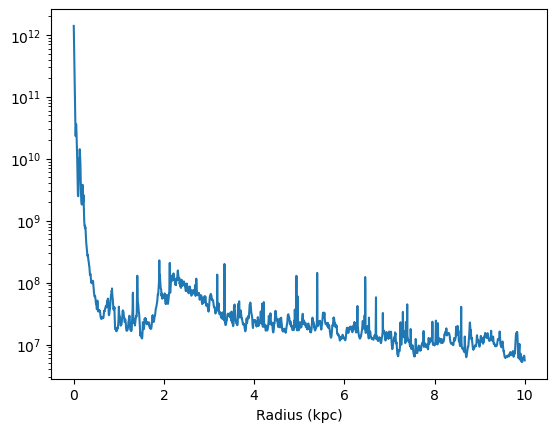

In [32]:
##Overdensities
def radial_profile(data):
    center = [int(i / 2) for i in data.shape]
    x, y = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return radialprofile

plt.clf()


radial = radial_profile(gas)
rad = np.linspace(0, np.sqrt(10**2 + 10 ** 2), radial.shape[0])

radial = radial[rad <= 10]
rad = rad[rad <= 10]

plt.semilogy(rad, radial)
plt.xlabel("Radius (kpc)")


[1.39379849e+12 1.10257085e+02 1.79187963e+08 1.00000000e+00]
[[1.55309838e+09 1.33834030e+04            nan 0.00000000e+00]
 [1.33834030e+04 2.13593434e-01 5.60105584e+02 0.00000000e+00]
 [           nan 5.60105584e+02 3.41817417e+07 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]


C:\Users\Shaurya\AppData\Local\Temp\ipykernel_23900\1806317724.py:12: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(pcov))


Text(0.5, 0, 'Radius (kpc)')

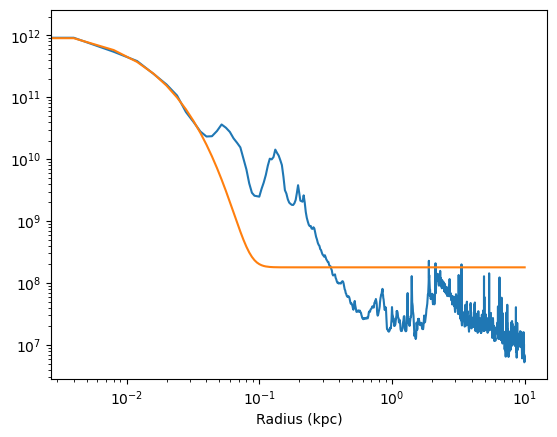

In [33]:
def sersic(x, a, b, c, n):
    n = 1
    return a * np.exp((x**(1/n)) * -b) + c

from scipy.optimize import curve_fit

bounds = ([10000, 0, -np.inf, 0], [np.inf, np.inf, np.inf, np.inf])

popt, pcov = curve_fit(sersic, rad, radial, maxfev = 2000, bounds = bounds)

print(popt)
print(np.sqrt(pcov))
plt.clf()

#radial = radial_profile(gas)
#rad = np.linspace(0, np.sqrt(10**2 + 10 ** 2), radial.shape[0])

plt.loglog(rad, radial)
plt.plot(rad, sersic(rad, *popt))
plt.xlabel("Radius (kpc)")

In [34]:
def radial_profile(data):
    center = [int(i / 2) for i in data.shape]
    x, y = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return radialprofile

In [35]:
def sersic(x, a, b, c, n):
    n = 1
    return a * np.exp((x**(1/n)) * -b) + c

[1.39379849e+12 1.10257085e+02 1.79187963e+08 1.00000000e+00]
179187962.78805518
[4.86824615e+09 5.73977721e+00 2.86843075e+07 1.00000000e+00]
28684307.49408


(0.0, 5000.0)

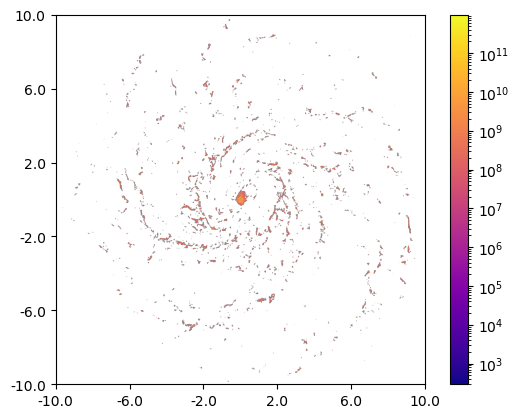

In [39]:
def overdensity(data):
    radial = radial_profile(data)
    rad = np.linspace(0, np.sqrt(10**2 + 10 ** 2), radial.shape[0])

    radial = radial[rad <= 10]
    rad = rad[rad <= 10]
    
    bounds = ([10000, 0, -np.inf, 0], [np.inf, np.inf, np.inf, np.inf])

    popt, pcov = curve_fit(sersic, rad, radial, maxfev = 2000, bounds = bounds)
    print(popt)
    
    x, y = np.meshgrid(range(data.shape[0]), range(data.shape[0]))
    center = [i / 2 for i in data.shape]
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r / r.max() * np.sqrt(10**2 + 10 ** 2)
    
    
    sphere = sersic(r, *popt)
    print(sphere.min())
    
    return data - sphere
    
from matplotlib import colors

plt.clf()
gas_over = overdensity(gas)
dm_over = overdensity(dm)
plt.imshow(gas_over, origin='lower', cmap='plasma', norm = colors.LogNorm())
plt.colorbar()


xticks = plt.xticks()[0][1:]
yticks = plt.yticks()[0][1:]

plt.xticks(xticks, np.round(xticks/res * 20 - 10,1))
plt.yticks(yticks, np.round(xticks/res * 20 - 10,1))

plt.xlim(0, res)
plt.ylim(0, res)
    
    
    

[1.39379849e+12 1.10257085e+02 1.79187963e+08 1.00000000e+00]
179187962.78805518
[4.86824615e+09 5.73977721e+00 2.86843075e+07 1.00000000e+00]
28684307.49408


(0.0, 5000.0)

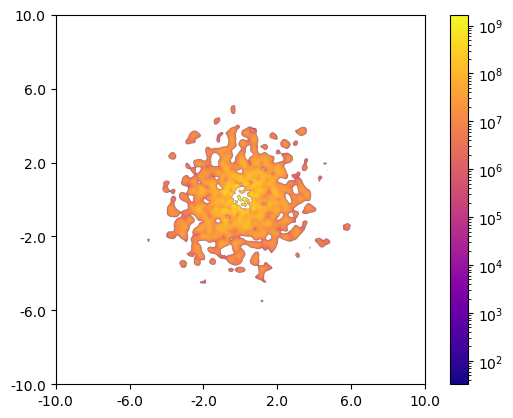

In [40]:
plt.clf()
gas_over = overdensity(gas)
dm_over = overdensity(dm)
plt.imshow(dm_over, origin='lower', cmap='plasma', norm = colors.LogNorm())
plt.colorbar()

xticks = plt.xticks()[0][1:]
yticks = plt.yticks()[0][1:]

plt.xticks(xticks, np.round(xticks/res * 20 - 10,1))
plt.yticks(yticks, np.round(xticks/res * 20 - 10,1))

plt.xlim(0, res)
plt.ylim(0, res)

[1.39379849e+12 1.10257085e+02 1.79187963e+08 1.00000000e+00]
179187962.78805518
[4.86824615e+09 5.73977721e+00 2.86843075e+07 1.00000000e+00]
28684307.49408


(0.0, 5000.0)

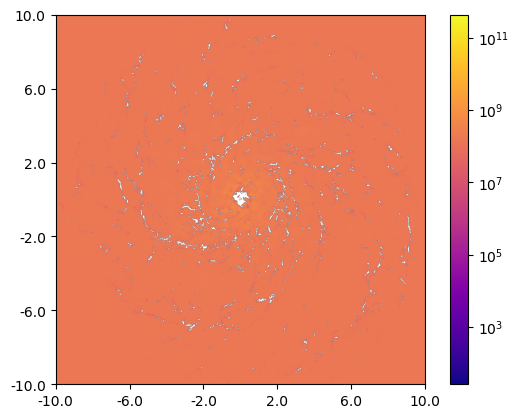

In [41]:
plt.clf()
gas_over = overdensity(gas)
dm_over = overdensity(dm)
plt.imshow(dm_over - gas_over, origin='lower', cmap='plasma', norm = colors.LogNorm())
plt.colorbar()

xticks = plt.xticks()[0][1:]
yticks = plt.yticks()[0][1:]

plt.xticks(xticks, np.round(xticks/res * 20 - 10,1))
plt.yticks(yticks, np.round(xticks/res * 20 - 10,1))

plt.xlim(0, res)
plt.ylim(0, res)

In [42]:
relation = dm_over - gas_over
relation = -relation
x1 = np.indices(relation.shape)[0].flatten()
x2 = np.indices(relation.shape)[1].flatten()
X = np.array([x1, x2]).T
Y = relation.flatten()

dens = np.mean(relation)
avg_dist = (dens * 1.5) ** (-1/3) 
avg_dist *= 1.5

C:\Users\Shaurya\AppData\Local\Temp\ipykernel_23900\1145514742.py:9: RuntimeWarning: invalid value encountered in scalar power
  avg_dist = (dens * 1.5) ** (-1/3)


In [43]:
from sklearn.cluster import DBSCAN

clf = DBSCAN(eps=np.sqrt(2))
clf.fit(X, sample_weight=Y)

,eps,np.float64(1.4142135623730951)
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [44]:
for i in range(-1, clf.labels_.max() + 1):
    print(i, np.sum(clf.labels_ == i))

-1 24481571
0 9
1 197
2 83
3 241
4 65
5 488
6 30
7 158
8 66
9 129
10 654
11 533
12 413
13 50
14 303
15 82
16 148
17 38
18 57
19 92
20 21
21 72
22 134
23 342
24 209
25 51
26 42
27 422
28 68
29 45
30 30
31 507
32 92
33 170
34 33
35 57
36 21
37 97
38 60
39 20
40 1868
41 170
42 68
43 318
44 550
45 305
46 122
47 87
48 220
49 831
50 224
51 670
52 47
53 376
54 101
55 9
56 3068
57 321
58 40
59 166
60 75
61 42
62 128
63 312
64 644
65 390
66 16
67 26
68 1326
69 90
70 113
71 28
72 39
73 15
74 25
75 2128
76 101
77 366
78 587
79 42
80 534
81 280
82 101
83 54
84 614
85 271
86 549
87 81
88 53
89 1238
90 109
91 121
92 46
93 54
94 83
95 44
96 16
97 208
98 76
99 37
100 420
101 138
102 179
103 132
104 531
105 67
106 23
107 316
108 109
109 653
110 42
111 243
112 86
113 42
114 83
115 24
116 218
117 130
118 96
119 121
120 92
121 229
122 26
123 47
124 92
125 98
126 66
127 542
128 24
129 126
130 493
131 108
132 223
133 141
134 176
135 627
136 212
137 15
138 220
139 85
140 460
141 60
142 79
143 420
144 39
145 

(0.0, 5000.0)

<Figure size 640x480 with 0 Axes>

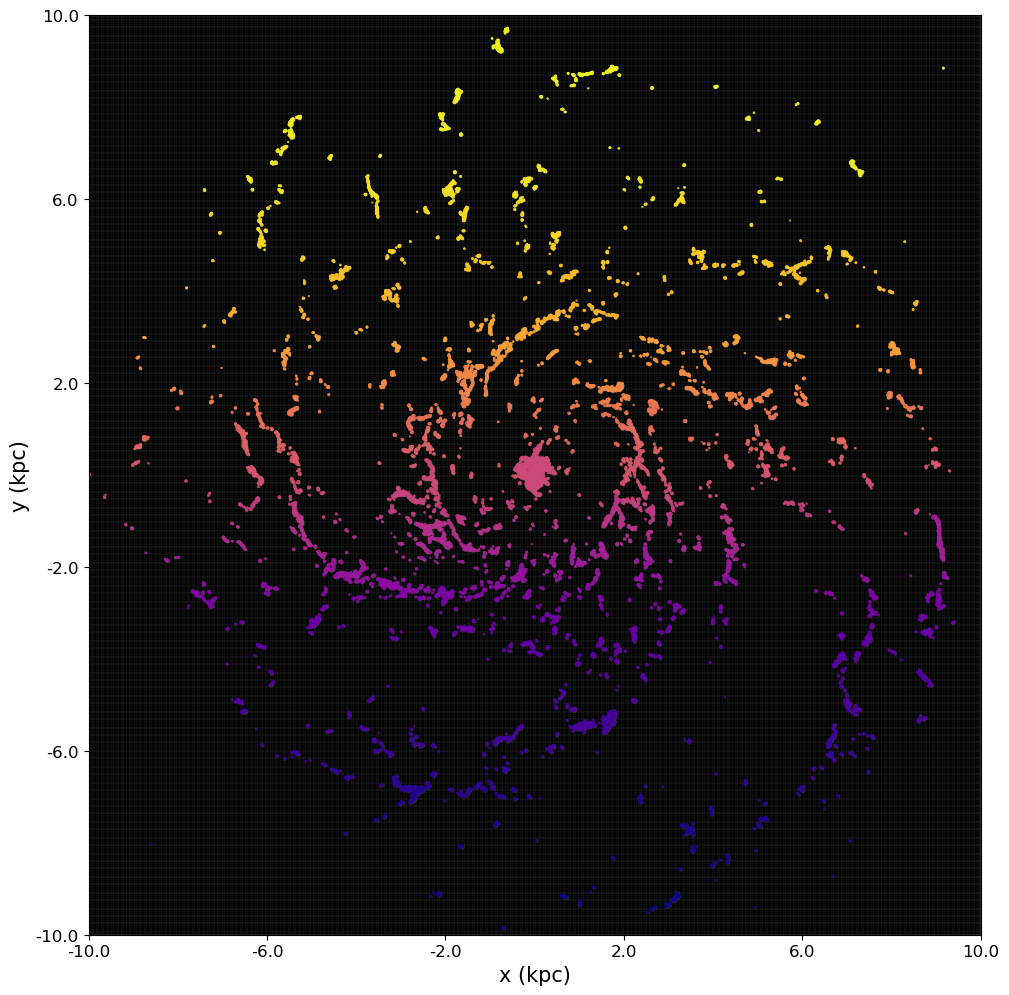

In [45]:
outliers = clf.labels_ == -1

radius = 10 #kpc
plt.clf()
#make a scatter plot with points coloured according to the DBSCAN labels
cmap = plt.get_cmap("plasma")
colors = cmap((clf.labels_+1)/np.max(clf.labels_+1))

#do things with sample weights and gas particle weights?

def dbscan(ax, fs=15):
    ax.scatter(X[outliers,1], X[outliers,0], facecolor='black', marker='.',
            s=0.1, alpha=0.05)
    ax.scatter(X[~outliers,1], X[~outliers,0], facecolor=colors[~outliers], marker='.',
            s=0.1, alpha=0.4)
    ax.set_xlabel('x (kpc)', fontsize=fs)
    ax.set_ylabel('y (kpc)', fontsize=fs)
    ax.tick_params(axis='both', labelsize=12)
    
    

fig, ax = plt.subplots(figsize=(10,10))
dbscan(ax)

#fig.gca().invert_xaxis()
fig.tight_layout()

xticks = plt.xticks()[0][1:]
yticks = plt.yticks()[0][1:]
plt.xticks(xticks, np.round(xticks/res * 20 - 10,1))
plt.yticks(yticks, np.round(xticks/res * 20 - 10,1))

plt.xlim(0, res)
plt.ylim(0, res)

